***BY: TEAM DATA WIZARDS , Sec: 'A'***

        - Prathik B Jain (PES2201800058)
        - Nitish S (PES2201800368)
        - Sandeep Bhat (PES2201800632)
        - Supreet Ronad (PES2201800705)

***PROBLEM STATEMENT***

“Analysis of Employee Attrition Rate and Performance” 

***NAME OF THE DATASET:*** IBM HR ANALYTICS EMPLOYEE ATTRITION AND PERFORMANCE (Source: Kaggle)
 
***DATASET UPLOADED BY CONNECTING TO GOOGLE DRIVE...***

***NAME OF THE DATASET IN GOOGLE DRIVE:--***  Dataset_FULL.csv

# ***IMPORTING THE VARIOUS LIBRARIES REQUIRED FOR THE PROCESS OF DATA PROCESSING AND ANALYSIS***

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import xgboost as xgb
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


warnings.filterwarnings('ignore')

# --- READING THE DATASET AND DISPLAYING THE CONTENTS OF THE FIRST 10 ROWS----

dataset = pd.read_csv("Dataset_FULL.csv")
dataset.head(10)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ***DATA DESCRIPTION, VISUALIZATION & PRE-PROCESSING***

In [ ]:
# --- HEATMAP SHOWING THE PEARSON'S CORRELATION COEFFICIENT OF EVERY ATTRIBUTE(COLUMN) WITH EVERY OTHER ATTRIBUTE ---

plt.figure(figsize=(16,6))
pearsoncorr=dataset.corr(method='pearson')
pearsoncorr
ax=sns.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns,yticklabels=pearsoncorr.columns,cmap='RdBu_r',annot=True,linewidth=0.2)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [ ]:
# --- DESCRIBING THE DATASET i.e. USING THE FIVE POINT SUMMARY, COUNT, MEAN AND STANDARD DEVIATION ---

dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# --- CHECKING FOR NULL VALUES WITHIN THE ENTIRE DATASET ---

dataset.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# --- CHECKING FOR THE SUM OF NULL VALUES UNDER EACH ATTRIBUTE OF THE DATASET ---

dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

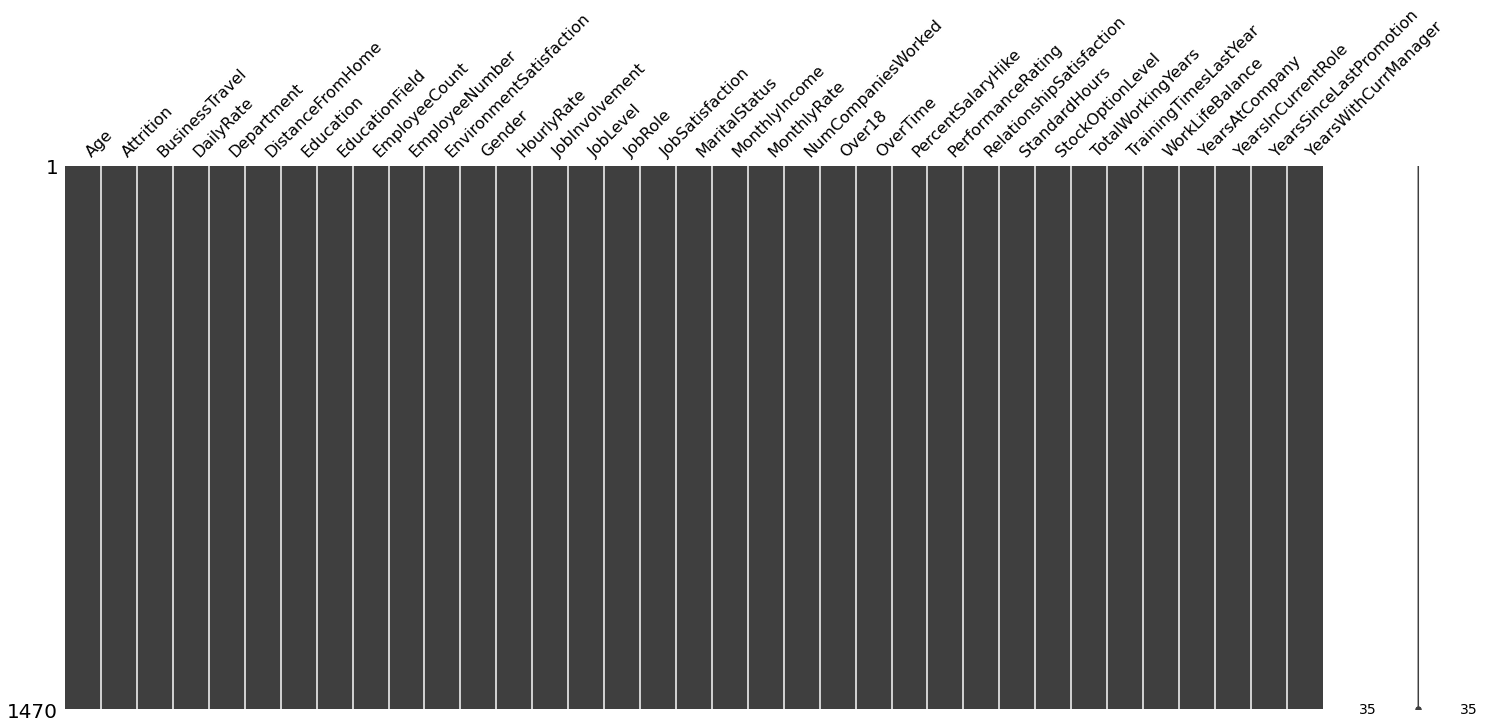

In [ ]:
# --- IMPROVED VISUALIZATION OF NULL VALUES IN THE DATASET USING A PLOT ---

import missingno as mns
mns.matrix(dataset)

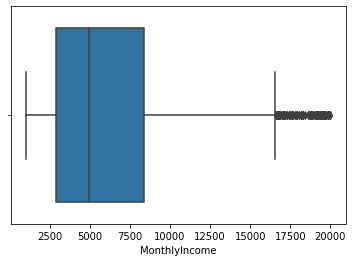

In [ ]:
# --- CONSTRUCTING A BOXPLOT TO DETECT OUTLIERS PRESENT IN THE 'MonthlyIncome' ATTRIBUTE --- 

sns.boxplot(x=dataset['MonthlyIncome'])

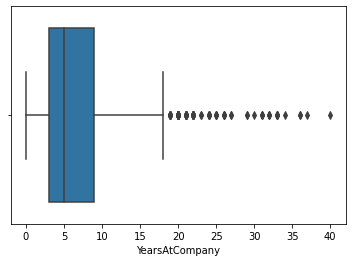

In [ ]:
# --- CONSTRUCTING A BOXPLOT TO DETECT OUTLIERS PRESENT IN THE 'YearsAtCompany' ATTRIBUTE --- 

sns.boxplot(x=dataset['YearsAtCompany'])

In [ ]:
# --- REASSIGNING TARGET AND DROPPING USELESS FEATURES ---

# Reassign target

dataset.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

# Drop useless feat

data = dataset.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18','EmployeeNumber'
                        ])

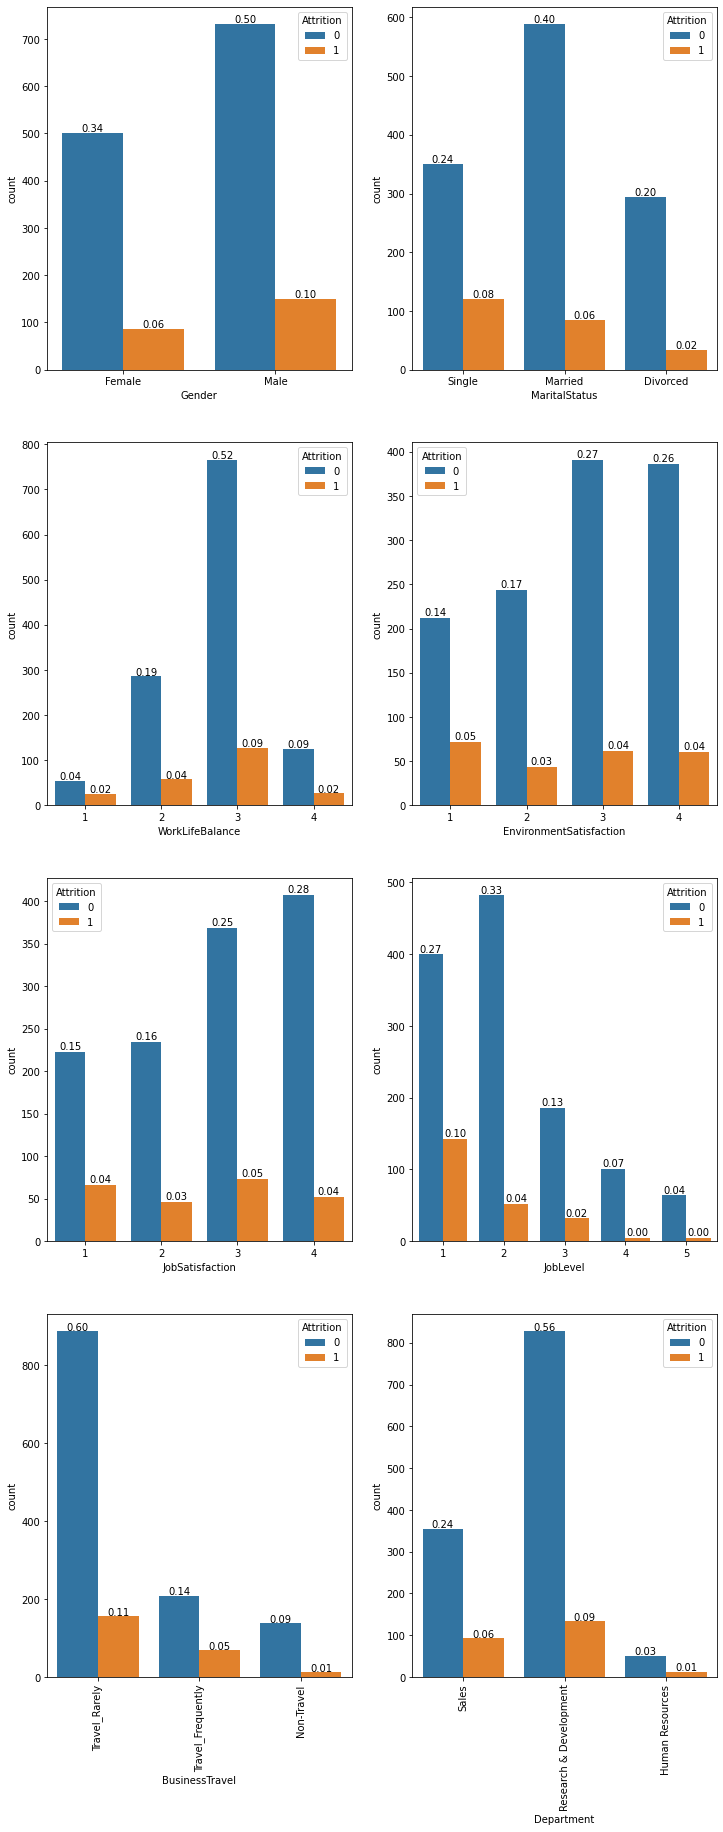

In [ ]:
# --- PLOTTING THE COUNT OF ATTRITION(1) OR NO ATTRITION(0) IN RELATION TO VALUES OF THE VARIOUS ATTRIBUTES ---

hrdata=dataset
total_records= len(hrdata)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=hrdata,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

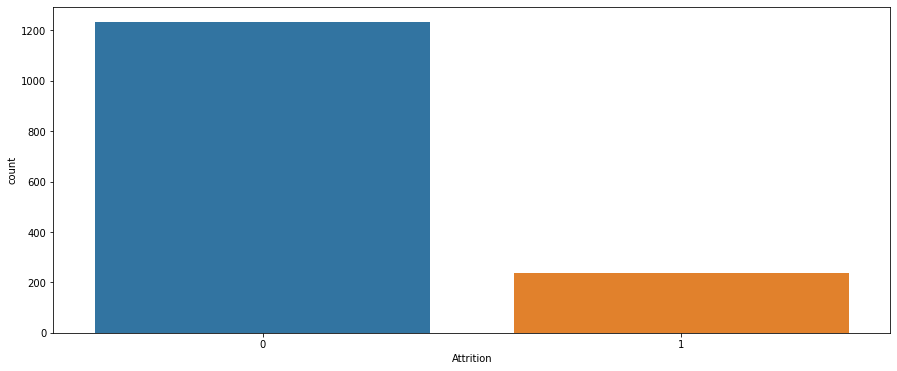

In [ ]:
# --- BAR GRAPH SHOWING THE COUNT OF ATTRITION (1) & NO ATTRITION (0) IN THE DATASET ---

plt.subplots(figsize=(15,6))
sns.countplot(x='Attrition', data = dataset)  

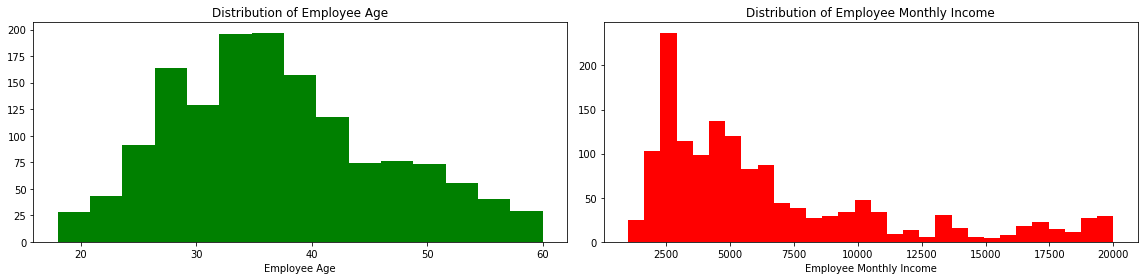

In [ ]:
# --- HISTOGRAM SHOWING THE DISTRIBUTION OF DATA IN THE DATASET ---

fig = plt.figure(figsize=(16,4))

# Histogram Plot for Employee Age
plt.subplot(1,2,1)
plt.hist(dataset['Age'], bins=15, color='green')
plt.title('Distribution of Employee Age')
plt.xlabel("Employee Age")

# Histogram Plot for employee Monthly Income
plt.subplot(1,2,2)
plt.hist(dataset['MonthlyIncome'], bins=30, color='red')
plt.title('Distribution of Employee Monthly Income')
plt.xlabel("Employee Monthly Income")

fig.tight_layout();

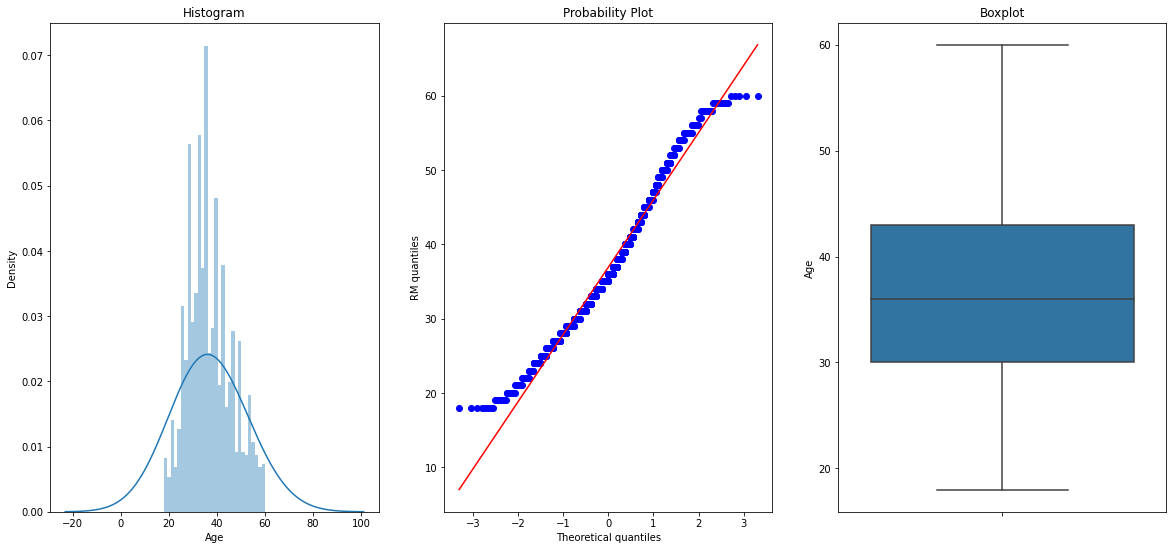

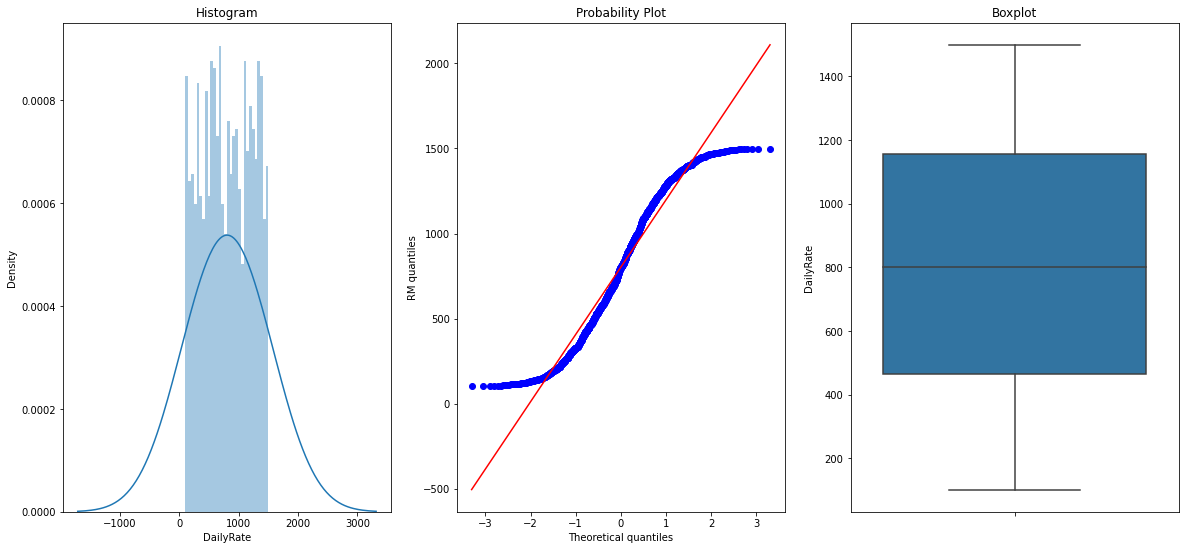

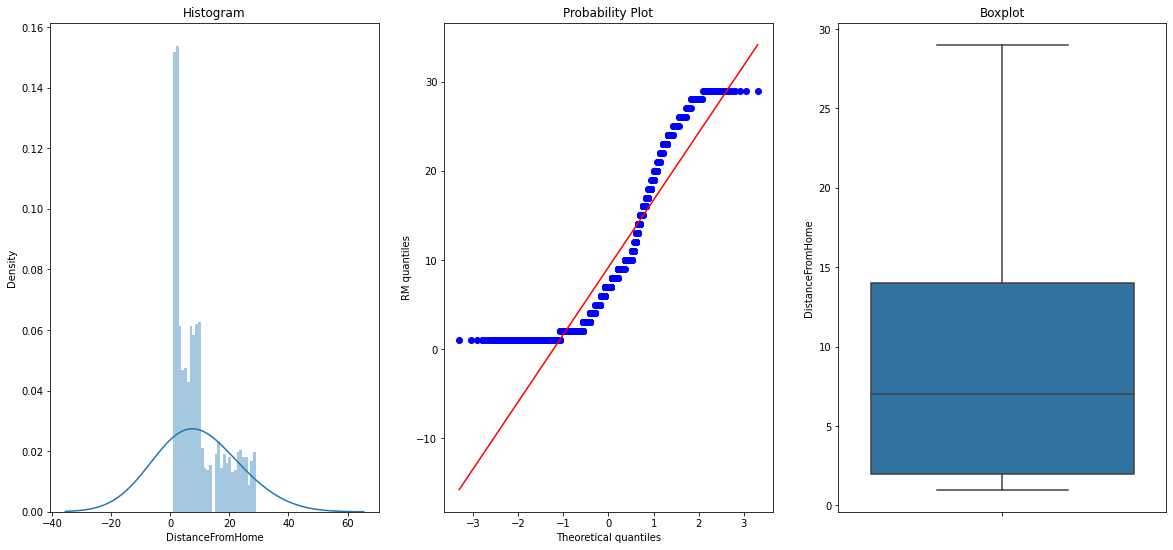

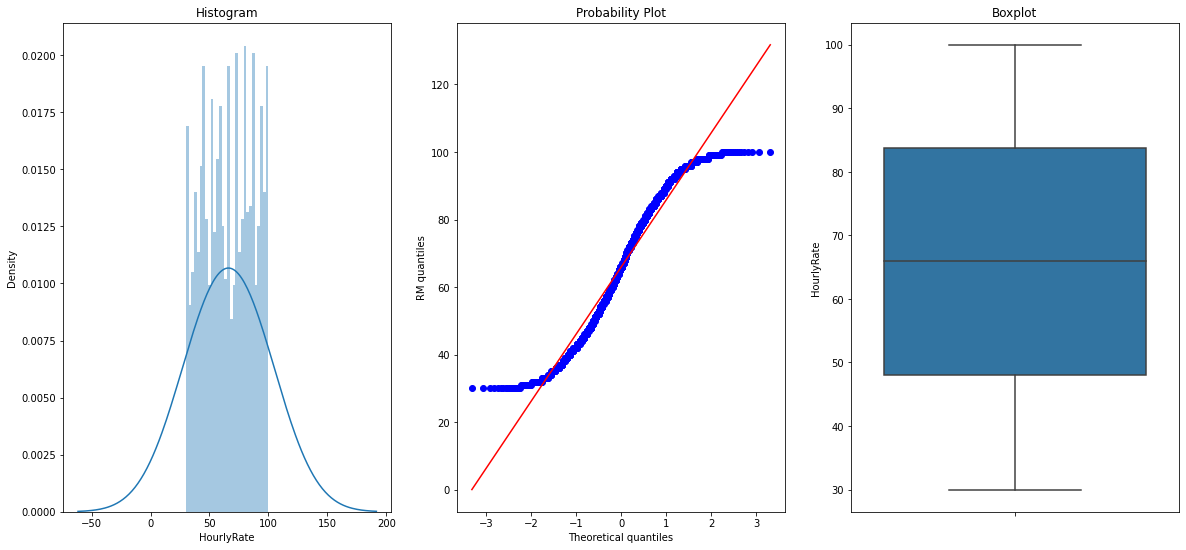

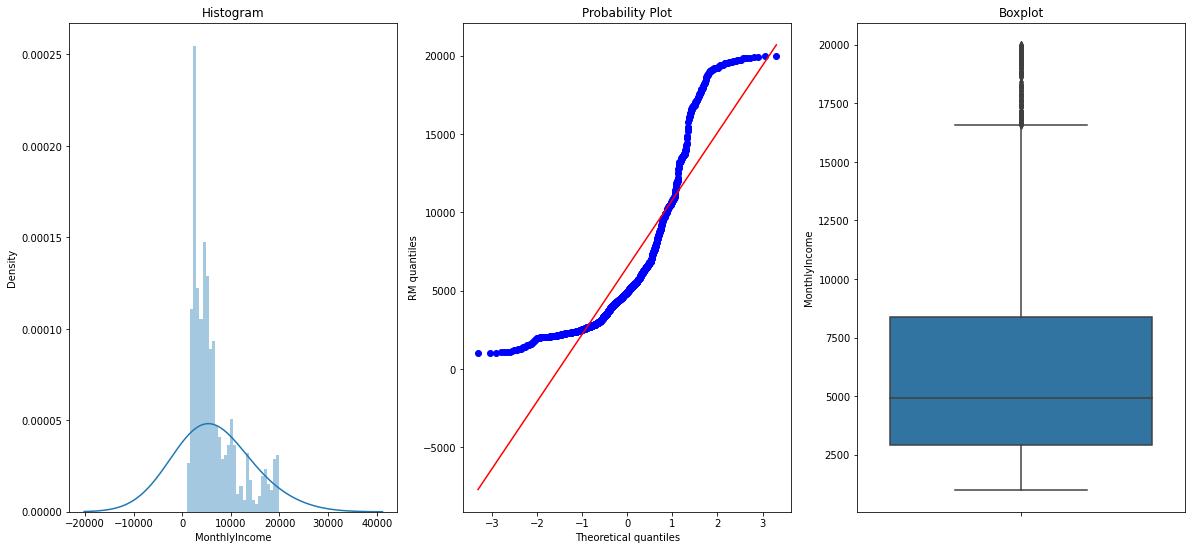

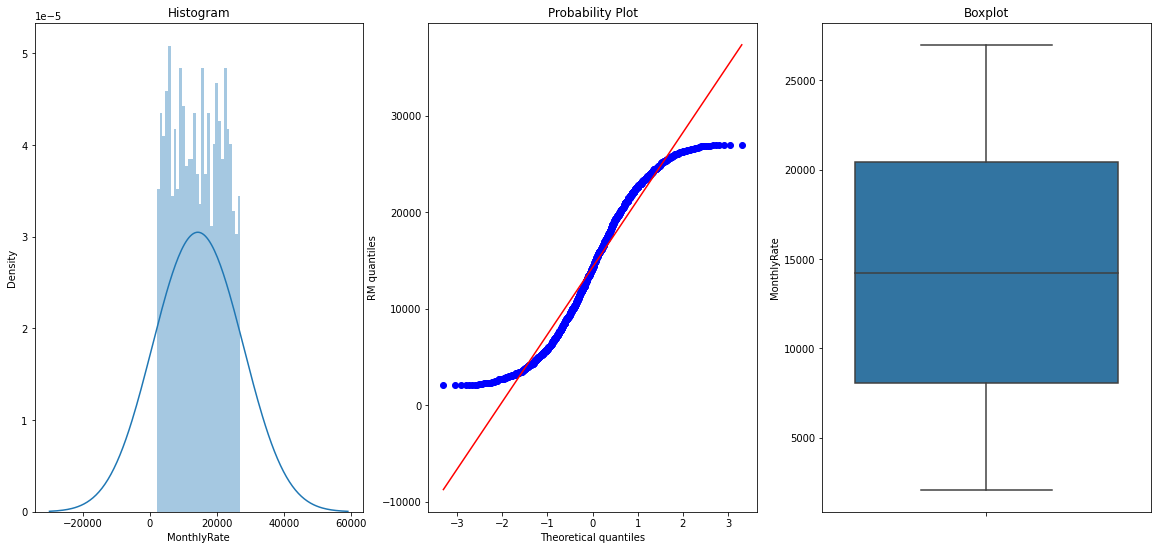

In [ ]:
# --- CONSTRUCTING DIAGNOSTIC PLOTS ( HISTOGRAM, PROBABILITY PLOTS, BOXPLOTS) FOR CERTAIN ATTRIBUTES IN THE DATASET ---

def diagnostic_plots(dataset, variable):
    
    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.distplot(dataset[variable], bins=30,kde_kws={'bw': 1.5})
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(dataset[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=dataset[variable])
    plt.title('Boxplot')
for i in ["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate"]:
       diagnostic_plots(dataset,i)

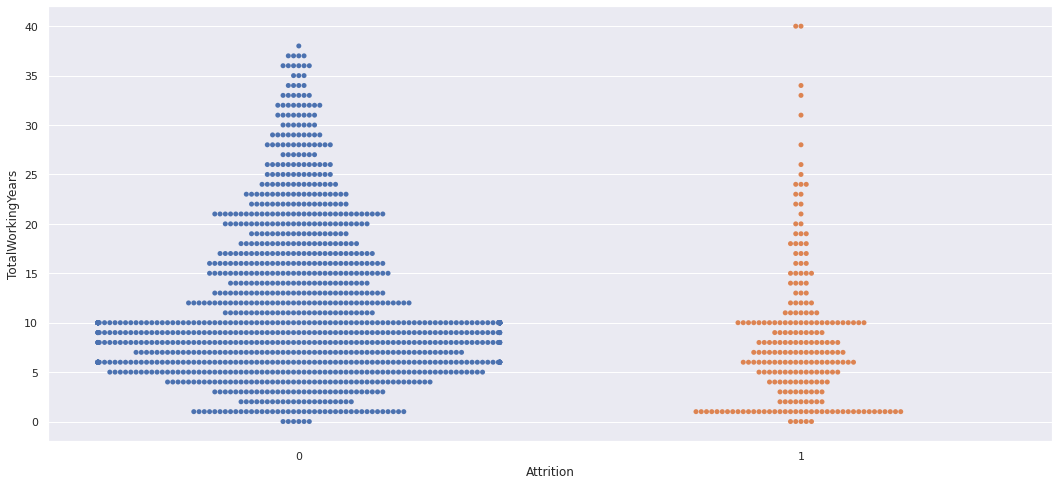

In [ ]:
# --- SWARMPLOTS TO SHOW THE DEPENDENCE OF ATTRITION(1) OR NO ATTRITION(0) WITH THE NUMBER OF WORKING YEARS ---

sns.set(rc={'figure.figsize': (18,8)})
sns.swarmplot(dataset['Attrition'], dataset['TotalWorkingYears'])

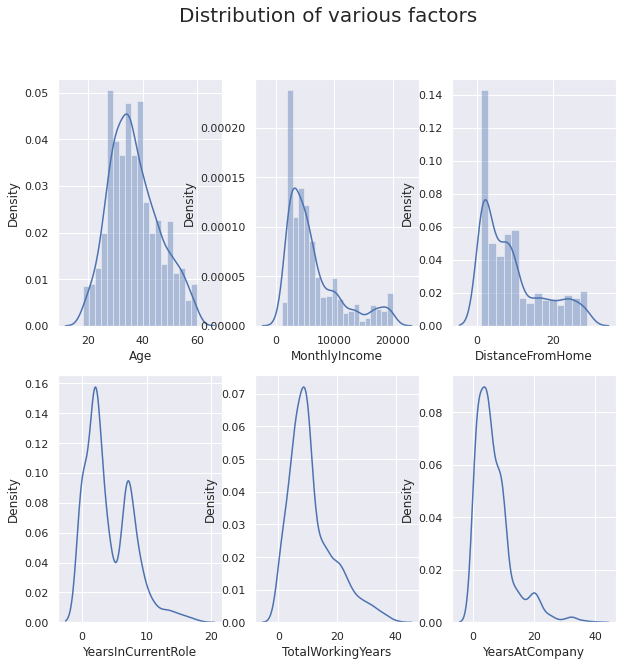

In [ ]:
# --- HISTROGRAMS TO SHOW THE DISTRIBUTION OF VARIOUS FACTORS ---

hr=dataset
fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.distplot(hr['Age'], ax = ax[0,0]) 
sns.distplot(hr['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(hr['DistanceFromHome'], ax = ax[0,2]) 
sns.kdeplot(hr['YearsInCurrentRole'], ax = ax[1,0]) 
sns.kdeplot(hr['TotalWorkingYears'], ax = ax[1,1]) 
sns.kdeplot(hr['YearsAtCompany'], ax = ax[1,2])  
plt.show()

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


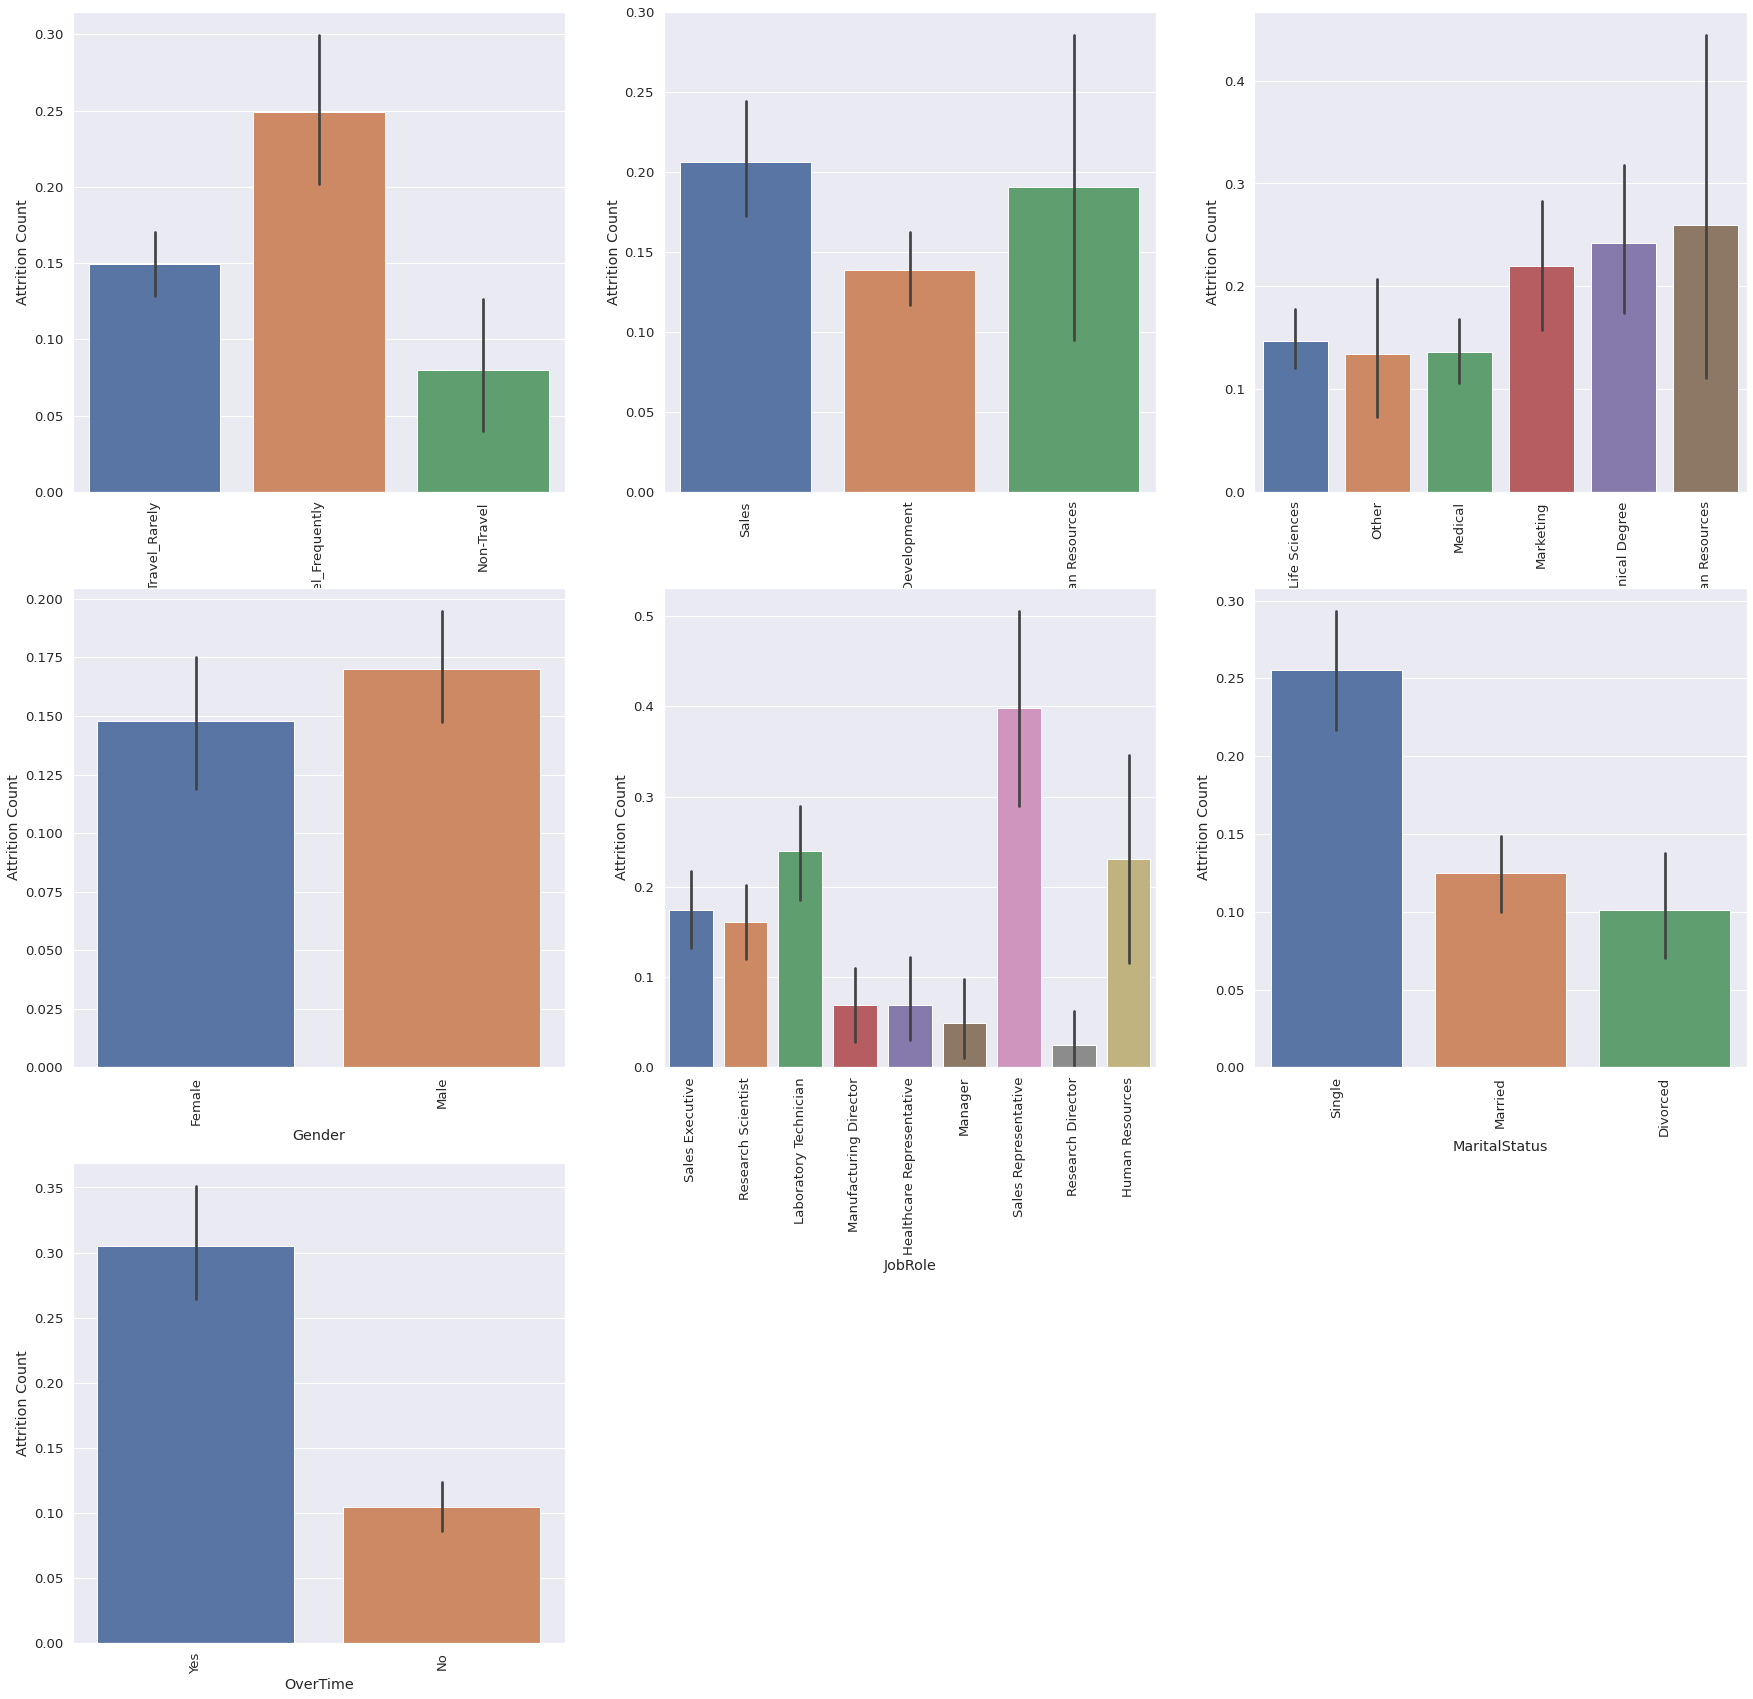

In [ ]:
# --- PLOTS SHOWING THE VALUES OF THE ATTRIBUTES WHICH TEND TO INFLUENCE ATTRITION THE MOST ---

df=dataset
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**RESULTS FROM THE ABOVE PLOTS**

BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.


                              ------------***********------------

# ***MODEL BUILDING  - 1 - DECISION TREES***

--- MUST KNOW TERMS ABOUT DECISION TREE ----

Decision Tree Classifier
Decision Tree parameters: 

***criterion:*** The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

***splitter:** The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

**max_depth:** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split:** The minimum number of samples required to split an internal node.

***min_samples_leaf:*** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

***min_weight_fraction_leaf:*** The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

**max_features:** The number of features to consider when looking for the best split.

***max_leaf_nodes:*** Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

***min_impurity_decrease:*** A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

***min_impurity_split:*** Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [ ]:
# --- TRANSFORMING CATEGORICAL ATTRIBUTES INTO DUMMIES ---

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

X = df.drop('Attrition', axis=1)
y = df.Attrition

In [ ]:
# --- DEFINING A PYTHON FUNCTION TO PRINT THE METRIC SCORES ---

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
# --- DIVIDING THE DATASET INTO TRAIN AND TEST DATASET WITH A TEST SIZE AS 20% ---

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=60)

In [ ]:
# --- CONSTRUCTING A DECISION TREE CLASSIFIER ---

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=48, splitter='best')

In [ ]:
# --- FITTING THE TRAIN DATASET TO THE CONSTRUCTED DECISION TREE ABOVE ---

tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=48, splitter='best')

In [ ]:
# --- PRINTING THE METRIC SCORES OF THE CONSTRUCTED DECISION TREE FOR THE TEST AND TRAIN DATASET ---

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8784

Classification Report: 
 	Precision: 0.7391304347826086
	Recall Score: 0.36363636363636365
	F1 score: 0.48745519713261654

Confusion Matrix: 
 [[965  24]
 [119  68]]

Test Result:
accuracy score: 0.8231292517006803

Classification Report: 
 	Precision: 0.45454545454545453
	Recall Score: 0.2
	F1 score: 0.2777777777777778

Confusion Matrix: 
 [[232  12]
 [ 40  10]]



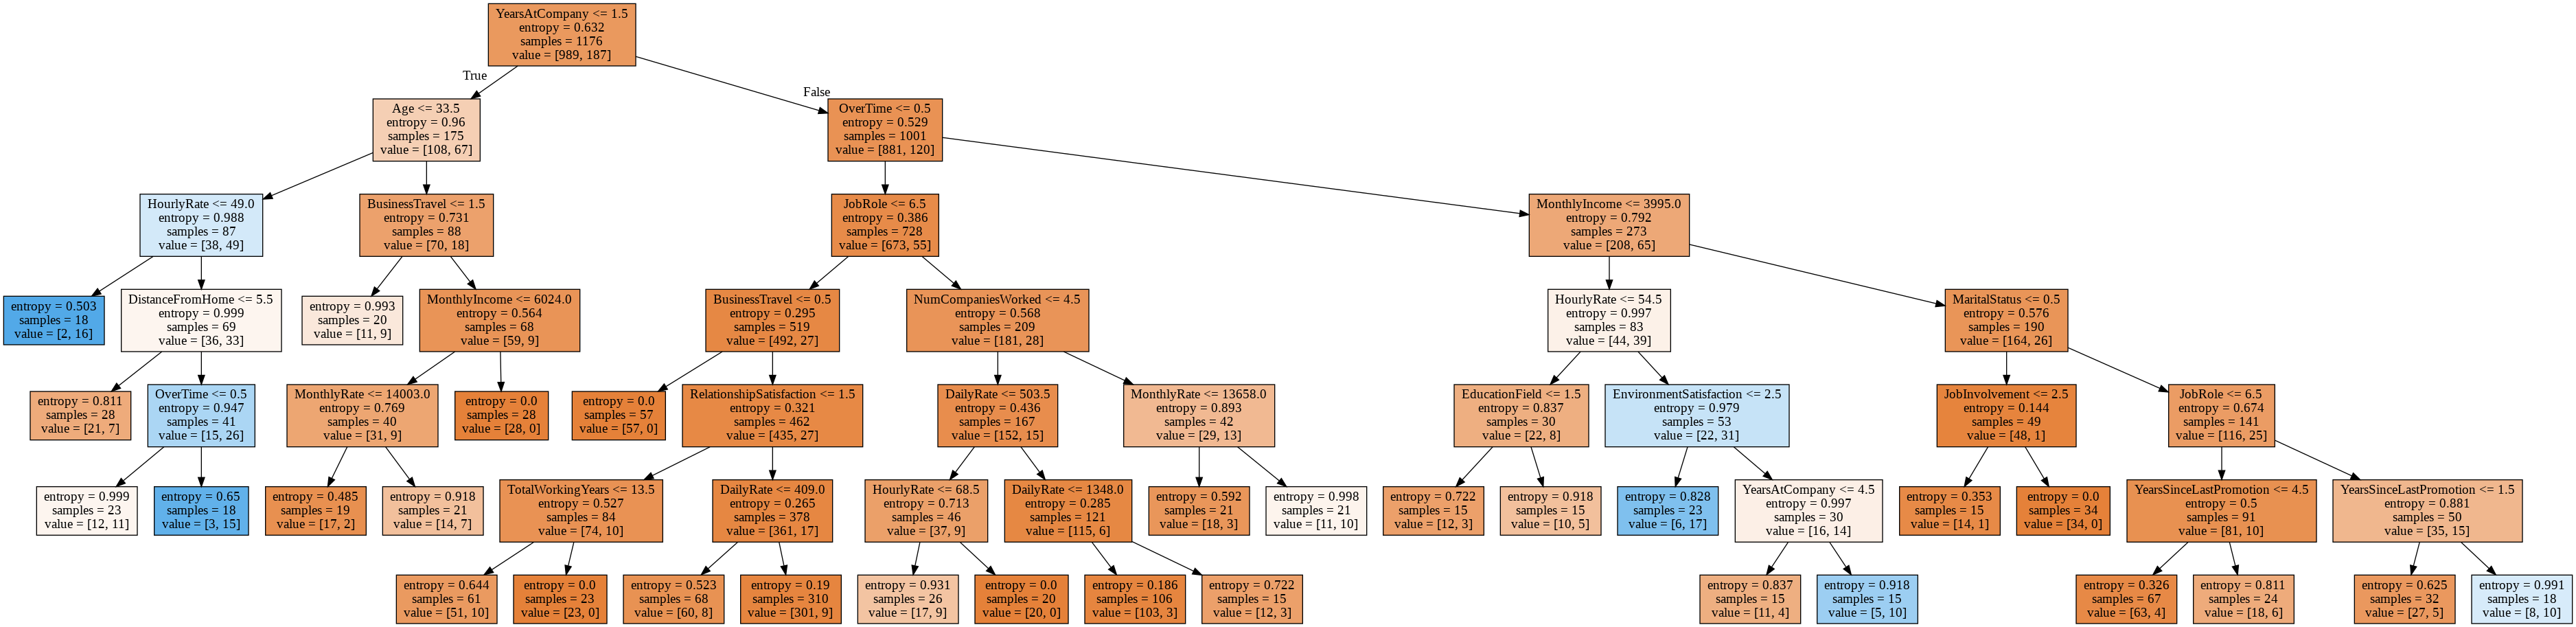

In [ ]:
# --- DEPICTION OF THE DECISION TREE CONSTRUCTED ---

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Attrition")

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features,filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

**DECISION TREE CONSTRUCTION WITH TEST SIZE AS 30% TO CHECK THE INFLUENCE OF TEST SIZE ON THE ACCURACY OF THE MODEL**

In [ ]:
# --- DIVIDING THE DATASET INTO TRAIN AND TEST DATASET WITH A TEST SIZE AS 30% ---

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [ ]:
# --- CONSTRUCTING A DECISION TREE CLASSIFIER ---

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=48, splitter='best')

In [ ]:
# --- FITTING THE TRAIN DATASET TO THE CONSTRUCTED DECISION TREE ABOVE ---

tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=48, splitter='best')

In [ ]:
# --- PRINTING THE METRIC SCORES OF THE CONSTRUCTED DECISION TREE FOR THE TEST AND TRAIN DATASET ---

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8776

Classification Report: 
 	Precision: 0.717391304347826
	Recall Score: 0.39759036144578314
	F1 score: 0.5116279069767442

Confusion Matrix: 
 [[837  26]
 [100  66]]

Test Result:
accuracy score: 0.8344671201814059

Classification Report: 
 	Precision: 0.4722222222222222
	Recall Score: 0.23943661971830985
	F1 score: 0.3177570093457944

Confusion Matrix: 
 [[351  19]
 [ 54  17]]



***RESULTS OF DECISION TREE CLASSIFIER:-***

ACCURACY OF THE MODEL FOR 20% AS TEST SIZE: ***82.31%***

ACCURACY OF THE MODEL FOR 30% AS TEST SIZE: ***83.44%***


# ***MODEL BUILDING  - 2 - LOGISTIC REGRESSION***

# New Section

In [ ]:
# --- RETURN A SUBSET OF THE DATAFRAME'S COLUMNS BASED ON THE COLUMN OBJECT DTYPES ---

Obj_col = dataset.select_dtypes(include='object')

In [ ]:
# --- COUNTING THE DISTINCT OBSERVATIONS OVER REQUESTED AXIS ---

Obj_col.nunique()
df.nunique().sort_values()

Attrition                      2
PerformanceRating              2
OverTime                       2
Gender                         2
MaritalStatus                  3
BusinessTravel                 3
Department                     3
RelationshipSatisfaction       4
JobSatisfaction                4
JobInvolvement                 4
StockOptionLevel               4
WorkLifeBalance                4
EnvironmentSatisfaction        4
JobLevel                       5
Education                      5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRat

In [ ]:
# --- DROP HIGHLY CORRELATED COLUMNS ---

df = df.drop(columns=['JobLevel','MonthlyIncome', 'TotalWorkingYears',
                      'YearsInCurrentRole', 'YearsWithCurrManager', 
                      'YearsSinceLastPromotion'])

In [ ]:
# --- CONVERTING / ENCODING CATEGORICAL VALUES ---

df_encoded=pd.get_dummies(dataset,columns=Obj_col.columns)
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# --- REPLACE TARGET OBJECT WITH INT ---

df['Attrition'] = df['Attrition'].replace('Yes', 0)
df['Attrition'] = df['Attrition'].replace('No', 1)
df['Attrition'] = df['Attrition'].astype('int64')

In [ ]:
# --- CHECK IF DATA IS BALANCED ---

df.Attrition.value_counts()
# imbalance
# target column

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
# --- REPLACE FEATURE OBJECTS WITH INT --- 

print(df.Attrition.value_counts())
print(df.BusinessTravel.value_counts())
print(df.Department.value_counts())
print(df.EducationField.value_counts())
print(df.Gender.value_counts())
print(df.JobRole.value_counts())
print(df.MaritalStatus.value_counts())
print(df.OverTime.value_counts())

0    1233
1     237
Name: Attrition, dtype: int64
2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64
1    961
2    446
0     63
Name: Department, dtype: int64
1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64
1    882
0    588
Name: Gender, dtype: int64
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64
1    673
2    470
0    327
Name: MaritalStatus, dtype: int64
0    1054
1     416
Name: OverTime, dtype: int64


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
colnames_to_encode = ['Attrition','BusinessTravel', 'Department', 'EducationField', 
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for c in colnames_to_encode:
    df[c] = label_encoder.fit_transform(df[c])
print(df.Attrition.value_counts())
print(df.BusinessTravel.value_counts())
print(df.Department.value_counts())
print(df.EducationField.value_counts())
print(df.Gender.value_counts())
print(df.JobRole.value_counts())
print(df.MaritalStatus.value_counts())
print(df.OverTime.value_counts())

0    1233
1     237
Name: Attrition, dtype: int64
2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64
1    961
2    446
0     63
Name: Department, dtype: int64
1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64
1    882
0    588
Name: Gender, dtype: int64
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64
1    673
2    470
0    327
Name: MaritalStatus, dtype: int64
0    1054
1     416
Name: OverTime, dtype: int64


In [ ]:
# --- MOVE TARGET TO THE LAST COLUMN FOR CONVINIENCE ---

target = df.Attrition
df = df.drop(labels=['Attrition'], axis=1)
df.insert(24,'Attrition',target)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Attrition
0,41,2,1102,2,1,2,1,2,0,94,3,7,4,2,19479,8,1,11,3,1,0,0,1,6,1
1,49,1,279,1,8,1,1,3,1,61,2,6,2,1,24907,1,0,23,4,4,1,3,3,10,0
2,37,2,1373,1,2,2,4,4,1,92,2,2,3,2,2396,6,1,15,3,2,0,3,3,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,6,3,1,23159,1,1,11,3,3,0,3,3,8,0
4,27,2,591,1,2,1,3,1,1,40,3,2,2,1,16632,9,0,12,3,4,1,3,3,2,0


In [ ]:
# --- SETTING THE INPUT AND OUTPUT i.e. X - input matrix, Y - output matrix ---

X = df_encoded.loc[:,df_encoded.columns!="Attrition"]
y = df_encoded["Attrition"]
print(X.head())
print(y.head())


   Age  BusinessTravel  ...  YearsSinceLastPromotion  YearsWithCurrManager
0   41               2  ...                        0                     5
1   49               1  ...                        1                     7
2   37               2  ...                        0                     0
3   33               1  ...                        3                     0
4   27               2  ...                        2                     2

[5 rows x 30 columns]
0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64


In [ ]:
# --- FIT_TRANSFORM CROSS CHECKS FOR MISSING VALUES AND PUTS THE APPROPRIATE VALUE ---
# --- NO MISING VALUES IN THE DATASET ---

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
y=y.values.reshape(-1,1)
print(X.shape)
print(y.shape)

(1470, 30)
(1470, 1)


In [ ]:
# --- DIVIDING THE DATASET INTO TRAIN AND TEST DATASET WITH TEST SIZE OF 20% ---

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [ ]:
# --- CHECKING THE DIMENSION OF THE TRAIN AND TEST SPLIT ---

print(X_train.shape)  
print(X_test.shape)

(1176, 30)
(294, 30)


In [ ]:
# --- NORMALIZE DATA, FEATURE SCALING ( it is very important to perform feature scaling here because all values lie in different ranges. If we don’t scale the features then some 
# --- feature will dominate others feature when the model finds the nearest neighbor to a data point in data space.) ---

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)
print(X_test)

[[ 2.51297627  0.58352828 -1.10333994 ... -1.15365277 -0.67412086
  -1.14385851]
 [-0.33398962  0.58352828  1.2497083  ... -1.15365277 -0.67412086
  -1.14385851]
 [-1.64797388 -0.9279899   1.36859916 ... -0.59660261 -0.35484332
  -0.58290038]
 ...
 [-0.11499224  0.58352828  0.09052243 ... -0.87512769 -0.67412086
  -1.14385851]
 [ 0.32300251  0.58352828 -0.45934779 ...  1.91012309 -0.03556578
   1.94141124]
 [-0.22449093  0.58352828 -1.56156512 ... -0.03955246 -0.67412086
  -0.30242131]]
[[ 1.41798939 -0.9279899  -1.19498497 ...  0.5174977   3.47648717
   1.3804531 ]
 [ 1.19899201  0.58352828 -0.46925536 ... -1.15365277 -0.67412086
  -1.14385851]
 [ 0.97999464  0.58352828 -1.64825637 ... -0.31807753 -0.35484332
  -0.02194224]
 ...
 [ 0.21350382  0.58352828 -0.50145497 ...  0.79602278 -0.35484332
   0.81949496]
 [-1.10048044  0.58352828  0.74194526 ... -0.59660261 -0.35484332
  -0.86337944]
 [-0.44348831 -0.9279899   1.19026287 ...  1.91012309  0.6029893
   0.81949496]]


In [ ]:
# --- HERE ONCE THE FEATURES ARE SCALED, THEY ARE BETWEEN -1 to 1. HENCE EACH FEATURE WILL CONTRIBUTE EQUALLY IN THE DECISION MAKING i.e. FINALIZING THE HYPOTHESIS ---
# --- FINALLY, TRAINING LOGISTIC REGRESSION MODEL ---

In [ ]:
# --- USE SMOTE TO OVER SAMPLE NOTING THAT THERE IS A LOT LESS 'YES' UNDER 'ATTRITION COLUMN ---

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10, ratio=1.0)
X_train_sm,  y_train_sm = sm.fit_sample(X_train, y_train)

In [ ]:
# --- USE RFE TO SELECT MOST IMPORTANT FEATURE FOR LOGISTIC REGRESSION ---

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=9)
rfe = RFE(model, 5)
fit = rfe.fit(X_train_sm, y_train_sm)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False False False False False False False False False False
 False  True False False False  True  True False False False  True  True
 False False False False False False]
Feature Ranking: [17 19 11 10 13 25 18  6 12 24  2 21 22  1 14  3 23  1  1 26 20  9  1  1
 15 16  7  5  4  8]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int64
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobRole                   1470 non-null   int64
 12  JobSatisfaction           1470 non-null   int64
 13  MaritalStatus             1470 non-null   int64
 14  MonthlyRate               1470 non-null 

In [ ]:
# --- DROP LESS IMPORTANT FEATURES ---

df = df.drop(columns=['BusinessTravel','DailyRate', 'Department',
                      'DistanceFromHome', 'Education', 'EducationField', 
                      'NumCompaniesWorked', 'Gender', 'HourlyRate',
                      'JobRole', 'JobSatisfaction','MonthlyRate', 'PercentSalaryHike',
                      'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                      'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany'])

In [ ]:
# --- USE SMOTE FEATURES AND TARGET TO PREDICT ---
# --- We can use the SMOTE implementation provided by the imbalanced-learn Python library in the SMOTE class.  ---

In [ ]:
model.fit(X_train_sm, y_train_sm)
y_pred = model.predict(X_test)

In [ ]:
# --- CONFUSION MATRIX ---
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[204,  48],
       [ 15,  27]])

In [ ]:
# --- HIGH RECALL, LOW PRECISION ---
# --- THIS MEANS THE COMPANY IS ABLE TO SIEVE OUT POTENTIAL PEOPLE WHO ARE GOING TO QUIT AND INTERVENE FIRST ---

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       252
           1       0.36      0.64      0.46        42

    accuracy                           0.79       294
   macro avg       0.65      0.73      0.66       294
weighted avg       0.85      0.79      0.81       294



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# --- USING THE LOGISTIC REGRESSION MODEL OBJECT TO TRAIN THE MODEL WITH THE TRAINING DATASET ---

model_lr= LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# --- WE ARE PASSING THE X_TEST DATA TO THE PREDICTOR MODEL ---

y_pred = model_lr.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# --- CONFUSION MATRIX ---

from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[247,   5],
       [ 28,  14]])

Accuracy 88.77551020408163 %

Roc value 0.8065948601662887


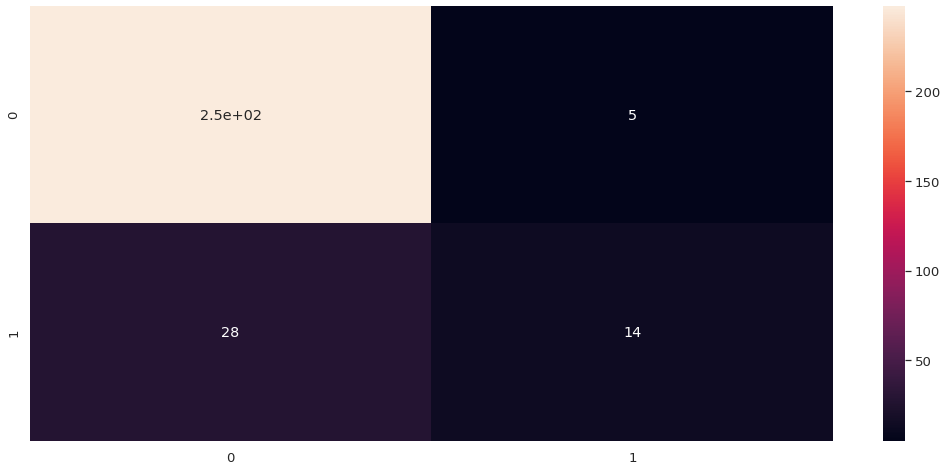

In [ ]:
# --- PLOTTING A CONFUSION MATRIX FOR THE PREDICTED VALUES AND DATASET ---

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
print('Accuracy {} %'.format(100* accuracy_score(y_pred,y_test)))
#Getting predicted probabilities
y_score = model_lr.predict_proba(X_test)[:,1]
print('\nRoc value '+ str(roc_auc_score(y_test, y_score)))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot =True)

In [ ]:
# --- METRIC SCORES OF THE RESULTS OBTAINED ---

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       252
           1       0.74      0.33      0.46        42

    accuracy                           0.89       294
   macro avg       0.82      0.66      0.70       294
weighted avg       0.88      0.89      0.87       294



AUC: 0.6567460317460316


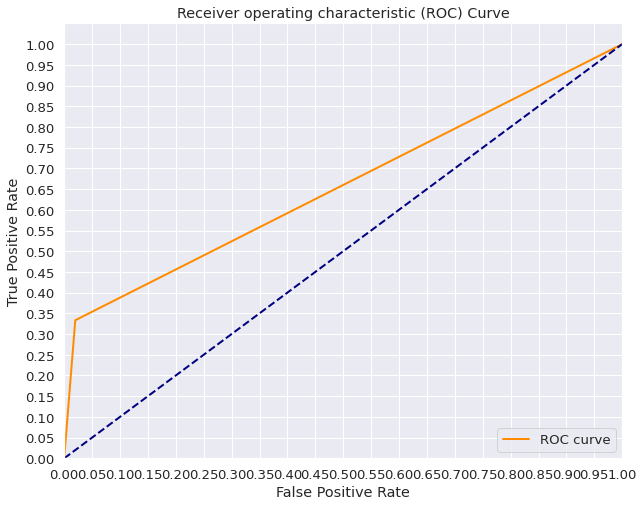

In [ ]:
# --- CHECKING AUC VALUE FOR 20% TEST DATA ---

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def ROC_curve(fpr,tpr):
    # Seaborn's beautiful styling
    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
    
    
ROC_curve(fpr,tpr)

**Training the same model with 30% of the data for testing to check its influence on the accuracy of model.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [ ]:
model_lr= LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)
print('Accuracy {} %'.format(100* accuracy_score(y_pred,y_test)))

Accuracy 86.16780045351474 %


In [ ]:
# --- CHECKING ROC VALUE OF MODEL AFTER CHANGING TEST SET ---

y_score = model_lr.predict_proba(X_test)[:,1]
print('\nRoc value '+ str(roc_auc_score(y_test, y_score)))


Roc value 0.8471536932027396


***RESULTS OF LOGISTIC REGRESSION MODEL:-***

ACCURACY OF THE MODEL FOR 20% AS TEST SIZE: ***88.775%***

ACCURACY OF THE MODEL FOR 30% AS TEST SIZE: ***86.16%***

In [ ]:
# --- FINDING AUC VALUE OF THE DATA FOR 30% TEST DATA ---

AUC: 0.6202039914573975


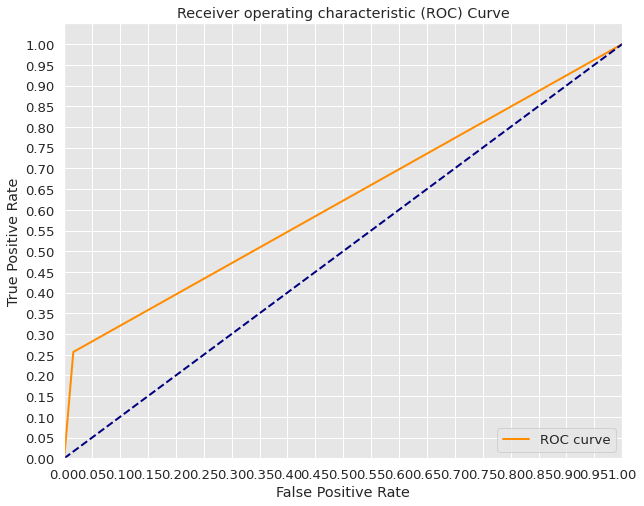

In [ ]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def ROC_curve(fpr,tpr):
    # Seaborn's beautiful styling
    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


print('AUC: {}'.format(auc(fpr, tpr)))


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
    
    
ROC_curve(fpr,tpr)